In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [ ]:
import math

In [ ]:
(X_train, _) , (_, _) = mnist.load_data()

In [ ]:
print(X_train.shape)

(60000, 28, 28)


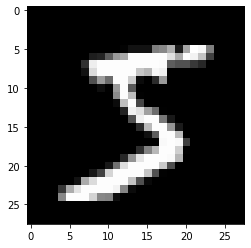

In [ ]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [ ]:
X_train = (X_train.astype('float32') - 127.5)/127.5

In [ ]:
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [ ]:
total_epochs = 50
batch_size = 256
no_of_batches = int(X_train.shape[0]/batch_size)
half_batch = 128
noise_dim = 100
adam = Adam(lr = 2e-4, beta_1 = 0.5)

In [ ]:
#Generator Input 100 Dim, Output 784 Dim

In [ ]:
generator = Sequential()
generator.add(Dense(256, input_shape = (noise_dim , )))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation = 'tanh'))
generator.compile(loss = 'binary_crossentropy', optimizer = adam)
generator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 784)             

In [ ]:
#discriminator input 784 Dim, output 1 Dim (prob of reality)

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(512, input_shape = (784, )))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation = 'sigmoid'))
discriminator.compile(loss = 'binary_crossentropy', optimizer = adam)
discriminator.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Connected gen with disc
discriminator.trainable = False
gan_input = Input(shape = (noise_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

model = Model(gan_input, gan_output)
model.compile(loss = 'binary_crossentropy', optimizer = adam)

In [ ]:
X_train = X_train.reshape((-1, 784))

In [ ]:
print(X_train.shape)

(60000, 784)


In [ ]:
def save_imgs(epoch, samples = 100):
  noise = np.random.normal(0,1,(samples, noise_dim))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(samples, 28, 28)
  plt.figure(figsize = (10,10))
  for i in range(samples):
     plt.subplot(10,10, i+1)
     plt.imshow(generated_imgs[i], cmap = 'gray' , interpolation='nearest')
     plt.axis('off')
  plt.tight_layout()
  plt.savefig("images/gan_output_epoch_{0}.png".format(epoch+1))
  plt.show()


EPoch 1  Discriminator Loss 0.6467  Generator Loss 0.9184
EPoch 2  Discriminator Loss 0.6517  Generator Loss 0.9913
EPoch 3  Discriminator Loss 0.6366  Generator Loss 1.0914
EPoch 4  Discriminator Loss 0.6151  Generator Loss 1.1935
EPoch 5  Discriminator Loss 0.6084  Generator Loss 1.1933


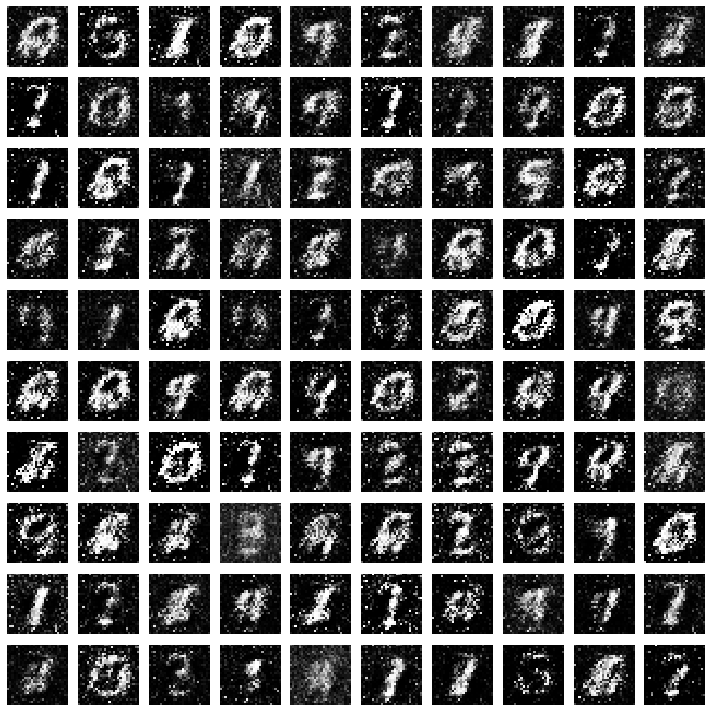

EPoch 6  Discriminator Loss 0.5801  Generator Loss 1.2594
EPoch 7  Discriminator Loss 0.5663  Generator Loss 1.3059
EPoch 8  Discriminator Loss 0.5847  Generator Loss 1.2368
EPoch 9  Discriminator Loss 0.6015  Generator Loss 1.1858
EPoch 10  Discriminator Loss 0.6438  Generator Loss 1.0508


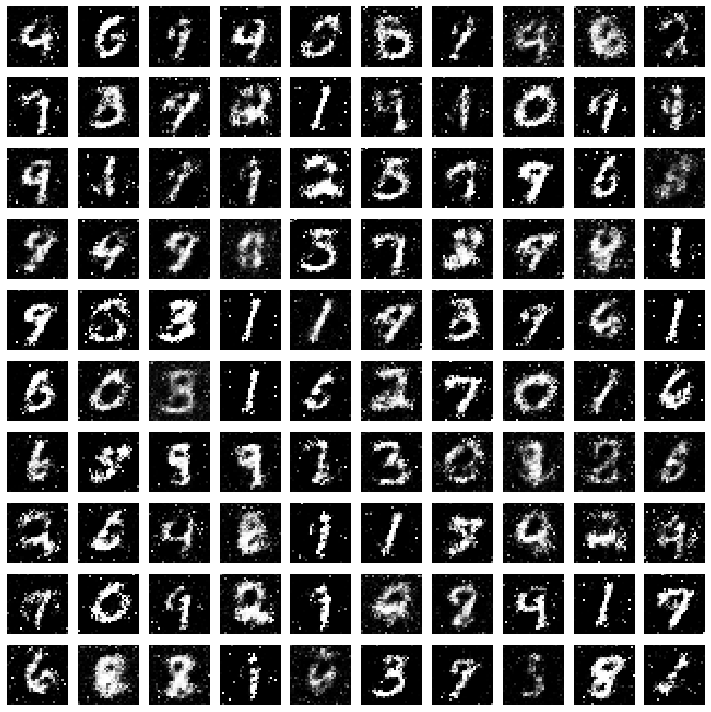

EPoch 11  Discriminator Loss 0.6457  Generator Loss 1.0306
EPoch 12  Discriminator Loss 0.6493  Generator Loss 1.0067
EPoch 13  Discriminator Loss 0.6511  Generator Loss 0.9935
EPoch 14  Discriminator Loss 0.6433  Generator Loss 1.0152
EPoch 15  Discriminator Loss 0.6473  Generator Loss 1.0120


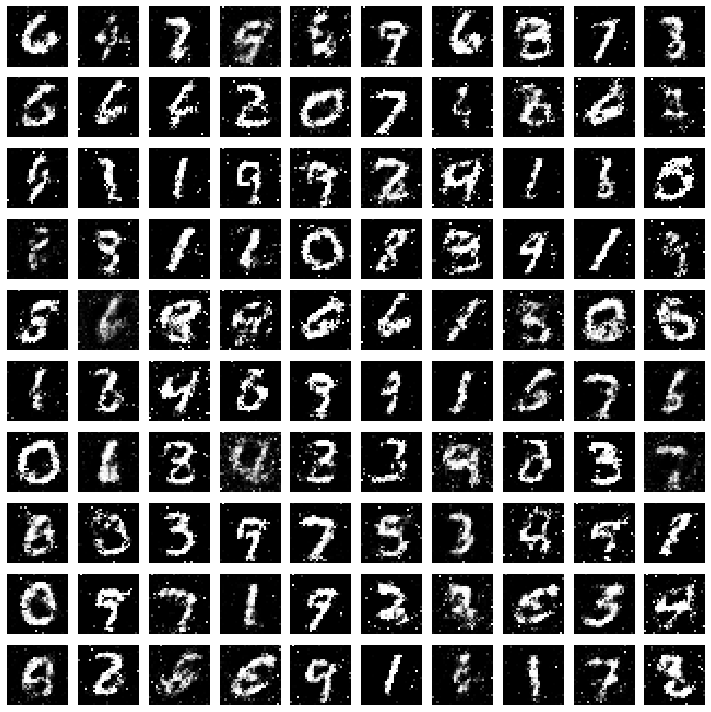

EPoch 16  Discriminator Loss 0.6448  Generator Loss 1.0179
EPoch 17  Discriminator Loss 0.6466  Generator Loss 1.0140
EPoch 18  Discriminator Loss 0.6479  Generator Loss 1.0151
EPoch 19  Discriminator Loss 0.6504  Generator Loss 1.0045
EPoch 20  Discriminator Loss 0.6506  Generator Loss 1.0073


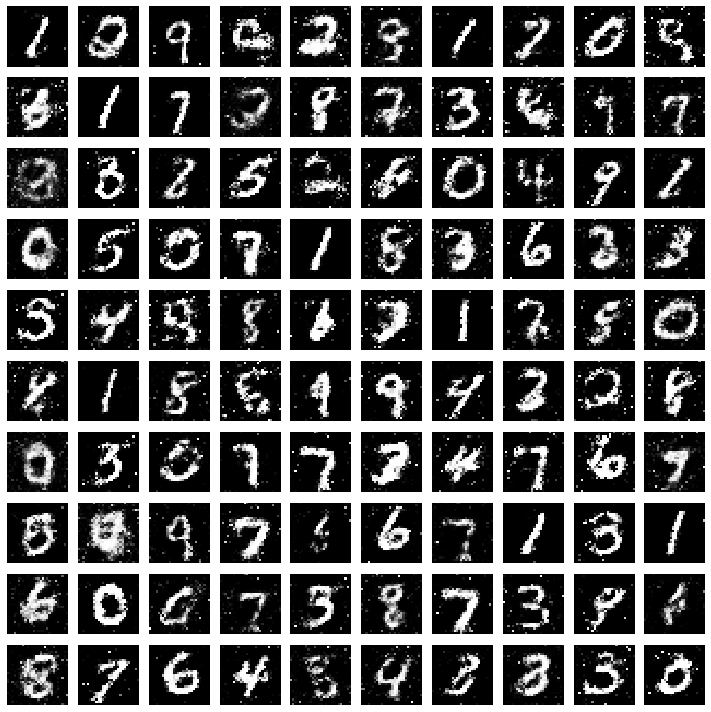

EPoch 21  Discriminator Loss 0.6549  Generator Loss 1.0013
EPoch 22  Discriminator Loss 0.6548  Generator Loss 0.9967
EPoch 23  Discriminator Loss 0.6541  Generator Loss 1.0041
EPoch 24  Discriminator Loss 0.6553  Generator Loss 1.0001
EPoch 25  Discriminator Loss 0.6583  Generator Loss 0.9929


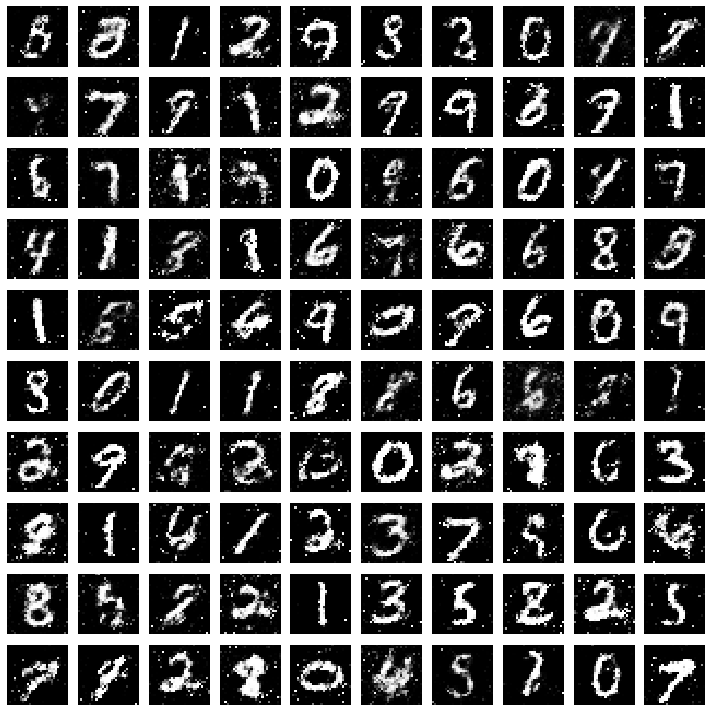

EPoch 26  Discriminator Loss 0.6604  Generator Loss 0.9903
EPoch 27  Discriminator Loss 0.6624  Generator Loss 0.9801
EPoch 28  Discriminator Loss 0.6627  Generator Loss 0.9814
EPoch 29  Discriminator Loss 0.6630  Generator Loss 0.9846
EPoch 30  Discriminator Loss 0.6630  Generator Loss 0.9809


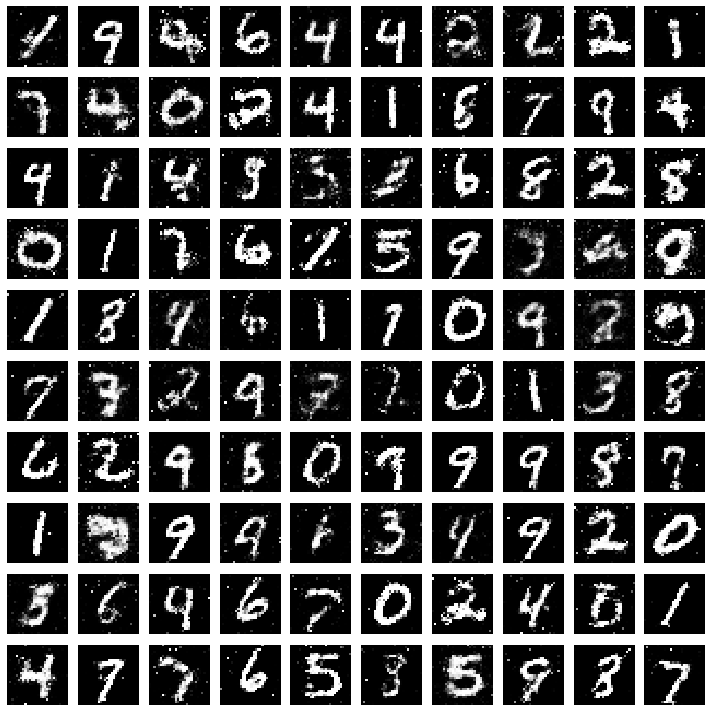

EPoch 31  Discriminator Loss 0.6617  Generator Loss 0.9867
EPoch 32  Discriminator Loss 0.6605  Generator Loss 0.9860
EPoch 33  Discriminator Loss 0.6628  Generator Loss 0.9810
EPoch 34  Discriminator Loss 0.6602  Generator Loss 0.9923
EPoch 35  Discriminator Loss 0.6612  Generator Loss 0.9902


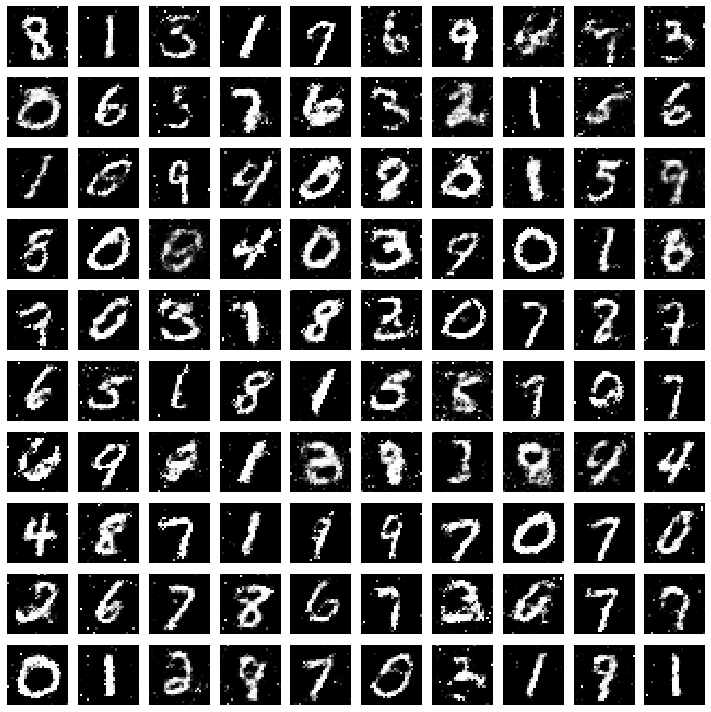

EPoch 36  Discriminator Loss 0.6640  Generator Loss 0.9795
EPoch 37  Discriminator Loss 0.6618  Generator Loss 0.9893
EPoch 38  Discriminator Loss 0.6622  Generator Loss 0.9845
EPoch 39  Discriminator Loss 0.6621  Generator Loss 0.9889
EPoch 40  Discriminator Loss 0.6627  Generator Loss 0.9802


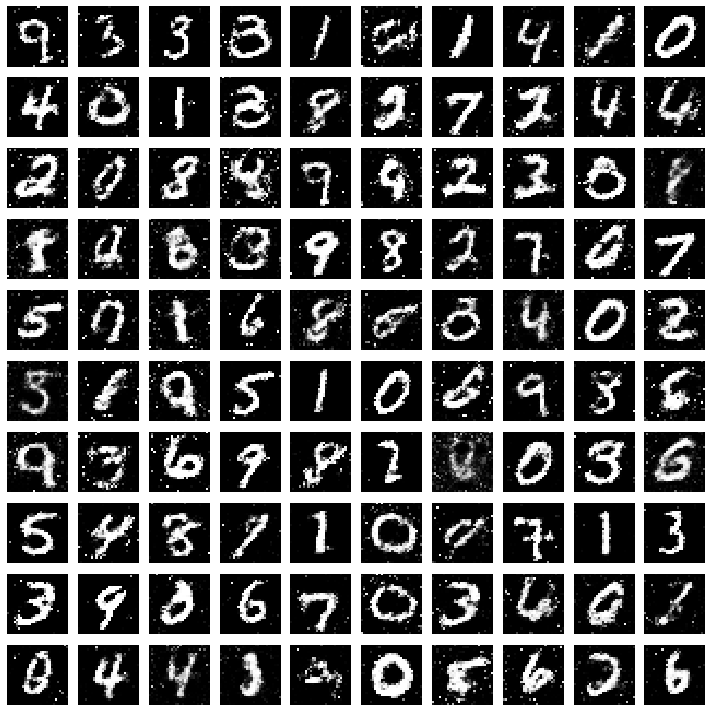

EPoch 41  Discriminator Loss 0.6633  Generator Loss 0.9846
EPoch 42  Discriminator Loss 0.6638  Generator Loss 0.9828
EPoch 43  Discriminator Loss 0.6644  Generator Loss 0.9788
EPoch 44  Discriminator Loss 0.6644  Generator Loss 0.9822
EPoch 45  Discriminator Loss 0.6657  Generator Loss 0.9781


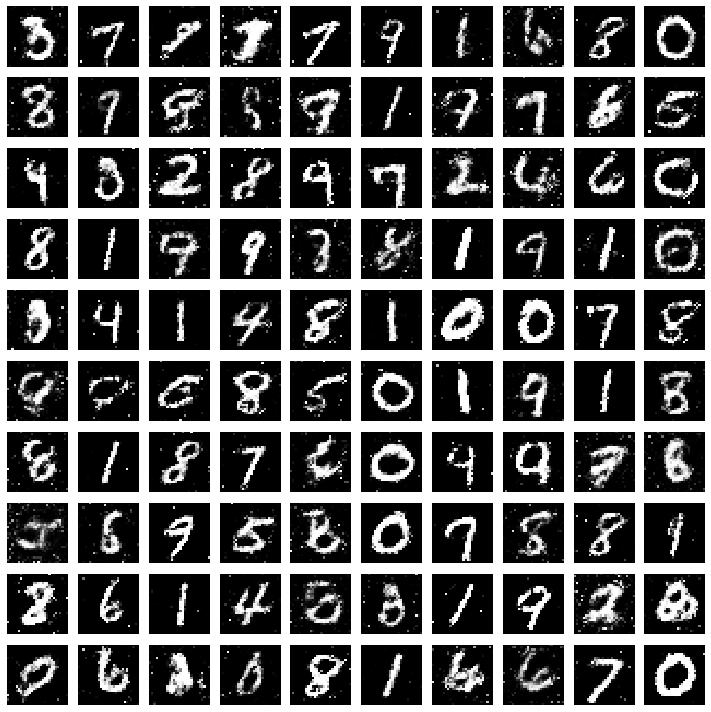

EPoch 46  Discriminator Loss 0.6655  Generator Loss 0.9777
EPoch 47  Discriminator Loss 0.6649  Generator Loss 0.9788
EPoch 48  Discriminator Loss 0.6658  Generator Loss 0.9754
EPoch 49  Discriminator Loss 0.6652  Generator Loss 0.9779
EPoch 50  Discriminator Loss 0.6661  Generator Loss 0.9717


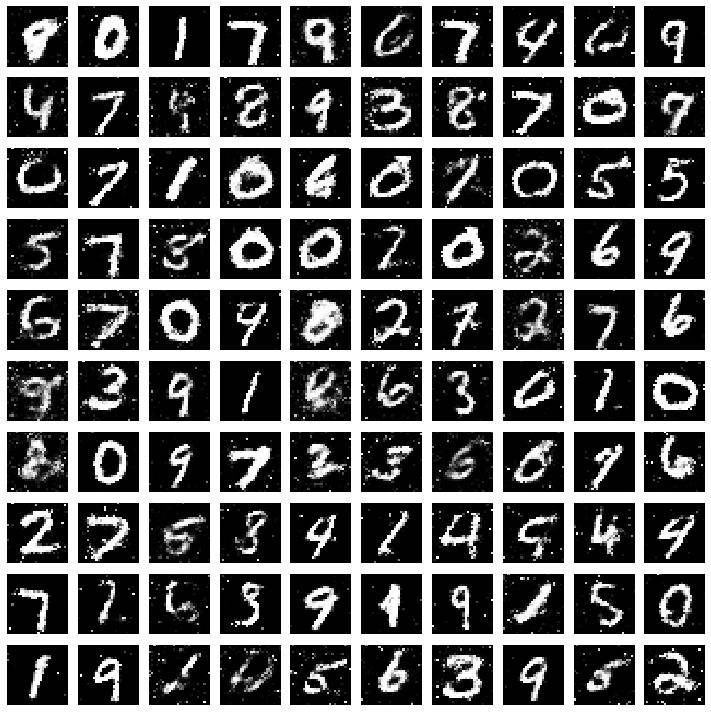

In [ ]:
for epoch in range(total_epochs):
  epochs_d_loss = 0.0
  epochs_g_loss = 0.0
  #SGD
  for step in range(no_of_batches):
    #First Train discriminator

    #Real data
    idx = np.random.randint(0, X_train.shape[0] , half_batch)
    real_imgs = X_train[idx]

    #Fake Data
    noise = np.random.normal(0,1, size = (half_batch, noise_dim))
    fake_imgs = generator.predict(noise)

    #labels
    real_y = np.ones((half_batch, 1)) * 0.9 #One side label smoothing
    fake_y = np.zeros((half_batch, 1))

    #Train Discriminator
    d_on_real = discriminator.train_on_batch(real_imgs, real_y)
    d_on_fake = discriminator.train_on_batch(fake_imgs, fake_y)
    d_loss = 0.5*d_on_real + 0.5*d_on_fake

    epochs_d_loss += d_loss

    #Train Generator
    noise = np.random.normal(0,1,size = (batch_size , noise_dim))
    ground_truth = np.ones((batch_size, 1))
    g_loss = model.train_on_batch(noise, ground_truth)
    epochs_g_loss += g_loss
  
  print("EPoch %d  Discriminator Loss %.4f  Generator Loss %.4f"%((epoch+1), epochs_d_loss/no_of_batches, epochs_g_loss/no_of_batches))
  if (epoch+1)%5 == 0:
    generator.save("model/gan_generator_{0}.h5".format(epoch+1))
    save_imgs(epoch)


In [ ]:
!mkdir images

In [ ]:
!ls

images	model  sample_data


In [ ]:
!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_30.png (deflated 6%)
  adding: content/images/gan_output_epoch_50.png (deflated 5%)
  adding: content/images/gan_output_epoch_5.png (deflated 4%)
  adding: content/images/gan_output_epoch_45.png (deflated 6%)
  adding: content/images/gan_output_epoch_15.png (deflated 6%)
  adding: content/images/gan_output_epoch_10.png (deflated 5%)
  adding: content/images/gan_output_epoch_35.png (deflated 6%)
  adding: content/images/gan_output_epoch_40.png (deflated 6%)
  adding: content/images/gan_output_epoch_20.png (deflated 6%)
  adding: content/images/gan_output_epoch_25.png (deflated 6%)


In [ ]:
from google.colab import files
files.download('images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

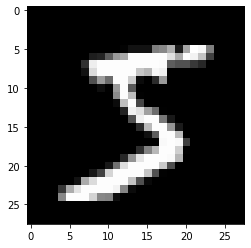

In [ ]:
d = X_train[0].reshape(28,28)
plt.imshow(d, cmap = 'gray')